# Olympics Effiency Analysis

#### **Objective:** Showcase end-to-end data analysiss using an Olympics dataset.

**Skills Demonstrated:**
- Data loading & cleaning
- Exploratory Data Analysis (EDA)
- Feature engineering
- Data visualization
- Statistical analysis
- Business insights & storytelling 

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### **1. Loading data**

In [2]:
filepath = "/kaggle/input/olympic-country-efficiency-dataset-19602016/olympic_countries_efficiency.csv"
df = pd.read_csv(filepath)
#df[index_col=="# Year"]

In [3]:
# Print the first five rows of the data
df.head()

,NOC,ISO3,Year,population,gdp_per_capita,income_group,host_country,athletes_sent,sports_participated,events_participated,female_athlete_percentage,prev_total_medals,prev_medals_per_athlete,Gold,Silver,Bronze,total_medals,medals_per_athlete
0,AFG,AFG,2004,23560654.0,221.763654,Low income,0,5,4,5,40.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,AFG,AFG,2008,26482622.0,381.733238,Low income,0,4,2,4,25.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.250000
2,AFG,AFG,2012,30560034.0,651.417134,Low income,0,6,4,6,16.666667,1.0,0.250000,0.0,0.0,1.0,1.0,0.166667
3,AFG,AFG,2016,34700612.0,522.082216,Low income,0,3,2,3,33.333333,1.0,0.166667,0.0,0.0,0.0,0.0,0.000000
4,ALB,ALB,1992,3247039.0,200.852220,Low income,0,7,4,8,22.222222,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


### **2. Understanding the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NOC                        248 non-null    object 
 1   ISO3                       248 non-null    object 
 2   Year                       248 non-null    int64  
 3   population                 248 non-null    float64
 4   gdp_per_capita             248 non-null    float64
 5   income_group               248 non-null    object 
 6   host_country               248 non-null    int64  
 7   athletes_sent              248 non-null    int64  
 8   sports_participated        248 non-null    int64  
 9   events_participated        248 non-null    int64  
 10  female_athlete_percentage  248 non-null    float64
 11  prev_total_medals          248 non-null    float64
 12  prev_medals_per_athlete    248 non-null    float64
 13  Gold                       248 non-null    float64

### **3. Data Cleaning & Validation**

In [5]:
# Renaming country column
df = df.rename(columns={"ISO3": "country"})

# Check duplicates and missing values
print('Duplicates: ', df.duplicated().sum())
print(df.isnull().sum())

Duplicates:  0
NOC                          0
country                      0
Year                         0
population                   0
gdp_per_capita               0
income_group                 0
host_country                 0
athletes_sent                0
sports_participated          0
events_participated          0
female_athlete_percentage    0
prev_total_medals            0
prev_medals_per_athlete      0
Gold                         0
Silver                       0
Bronze                       0
total_medals                 0
medals_per_athlete           0
dtype: int64


### **3. Exploratory Data Analysis (EDA)**

<Axes: title={'center': 'Average population per year'}, xlabel='Year', ylabel='Population'>

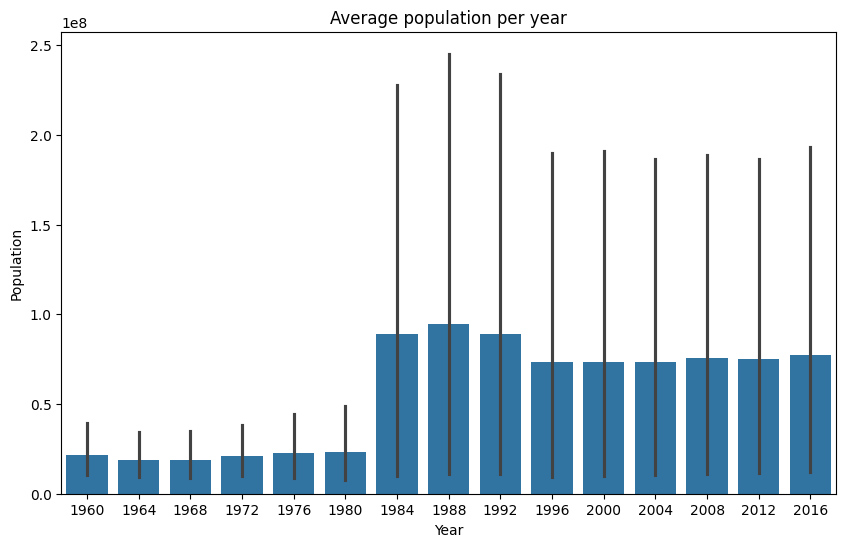

In [6]:
#Average population per year
plt.figure(figsize=(10,6))
plt.title("Average population per year")
plt.ylabel("Population")
sns.barplot(x=df["Year"], y=df["population"]) 


In [7]:
#Group by country and income
income_by_country = df.groupby(["country","income_group"])['income_group'].count().sort_values()
income_by_country

country  income_group       
ARG      Low income              1
AUT      Low income              1
BIH      Low income              1
AZE      Lower-middle income     1
ARM      Low income              2
AZE      Upper-middle income     2
ALB      Lower-middle income     2
         Low income              2
CHN      Upper-middle income     2
CAN      Upper-middle income     2
CHN      Lower-middle income     2
AUT      Lower-middle income     3
         Upper-middle income     3
BEL      Upper-middle income     3
BIH      Lower-middle income     3
AZE      Low income              3
BLR      Upper-middle income     3
         Lower-middle income     3
BIH      Upper-middle income     3
CAN      Lower-middle income     3
BOL      Lower-middle income     3
AUS      Upper-middle income     3
AND      Upper-middle income     3
DZA      Low income              3
COL      Upper-middle income     3
COM      Lower-middle income     3
DZA      Upper-middle income     3
ALB      Upper-middle inco

<Axes: title={'center': 'Number of events participated by income group'}, xlabel='income_group', ylabel='events_participated'>

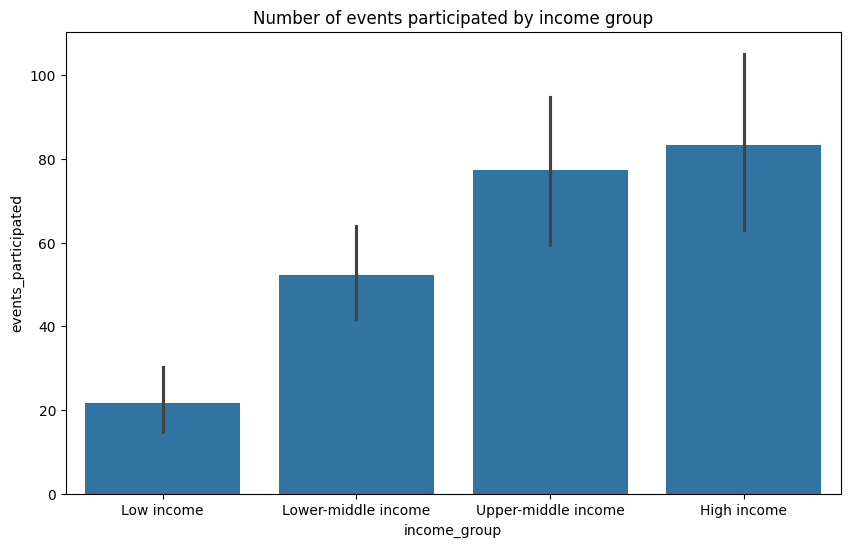

In [8]:
#Events participated by income group
plt.figure(figsize=(10,6))
plt.title("Number of events participated by income group")

sns.barplot(data=df, x="income_group", y="events_participated") 

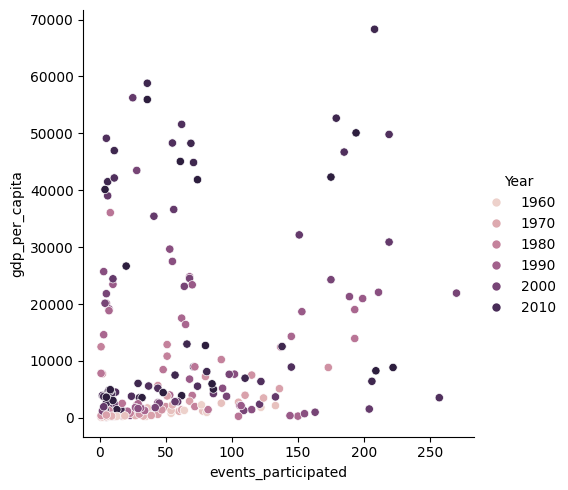

In [9]:
#Finding correlations
sns.relplot(data=df, x="events_participated", y="gdp_per_capita", hue="Year")
#Correlation between the gdp_per_capita and the number of events participated

In [10]:
#Medals by country
medals_by_country = df.groupby(['Year', 'country'])['medals_per_athlete'].sum()
medals_by_country
# Finding medals per athlete

#sns.

Year  country
1960  ARG        0.043478
      AUS        0.243386
      AUT        0.029126
      BEL        0.039604
      BRA        0.180556
                   ...   
2016  CMR        0.000000
      COL        0.055944
      COM        0.000000
      CPV        0.000000
      DZA        0.031250
Name: medals_per_athlete, Length: 248, dtype: float64

#### **Statiscal Correlation Analysis**

In [11]:
## Selecting features relevant to perfomance

corr_features = ['population', 'gdp_per_capita', 'athletes_sent',
                'sports_participated', 'female_athlete_percentage',
                'prev_total_medals', 'medals_per_athlete']
corr_matrix = df[corr_features].corr()
corr_matrix

,population,gdp_per_capita,athletes_sent,sports_participated,female_athlete_percentage,prev_total_medals,medals_per_athlete
population,1.000000,-0.102837,0.479332,0.411916,0.258873,0.539697,0.463188
gdp_per_capita,-0.102837,1.000000,0.268899,0.342063,0.240061,0.258149,0.152530
athletes_sent,0.479332,0.268899,1.000000,0.893943,0.342947,0.820096,0.668343
sports_participated,0.411916,0.342063,0.893943,1.000000,0.350021,0.700803,0.651211
female_athlete_percentage,0.258873,0.240061,0.342947,0.350021,1.000000,0.348899,0.232169
prev_total_medals,0.539697,0.258149,0.820096,0.700803,0.348899,1.000000,0.635730
medals_per_athlete,0.463188,0.152530,0.668343,0.651211,0.232169,0.635730,1.000000


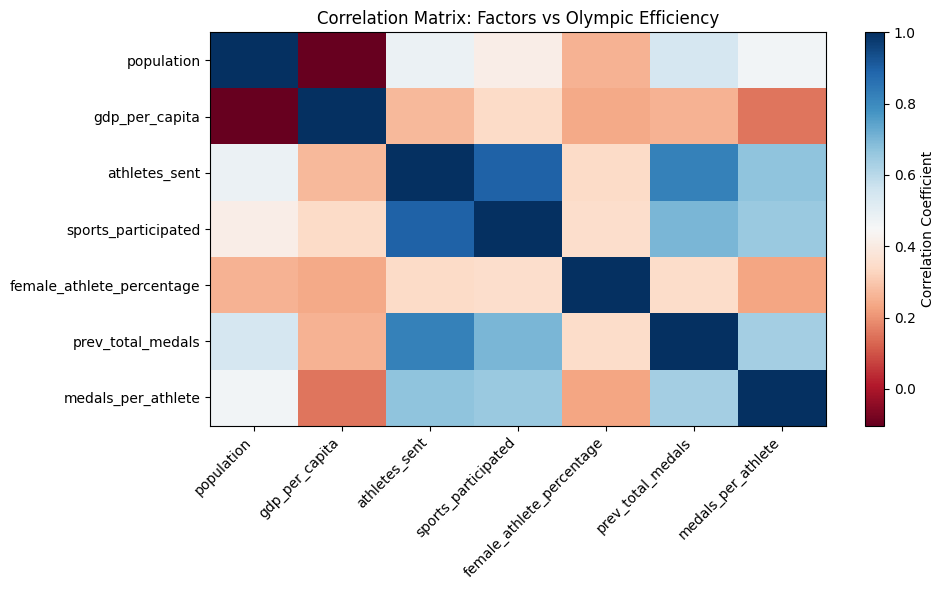

In [12]:
# Visualize correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, aspect='auto', cmap='RdBu')
plt.xticks(range(len(corr_features)), corr_features, rotation=45, ha='right')
plt.yticks(range(len(corr_features)), corr_features)
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix: Factors vs Olympic Efficiency')
plt.tight_layout()
plt.show()

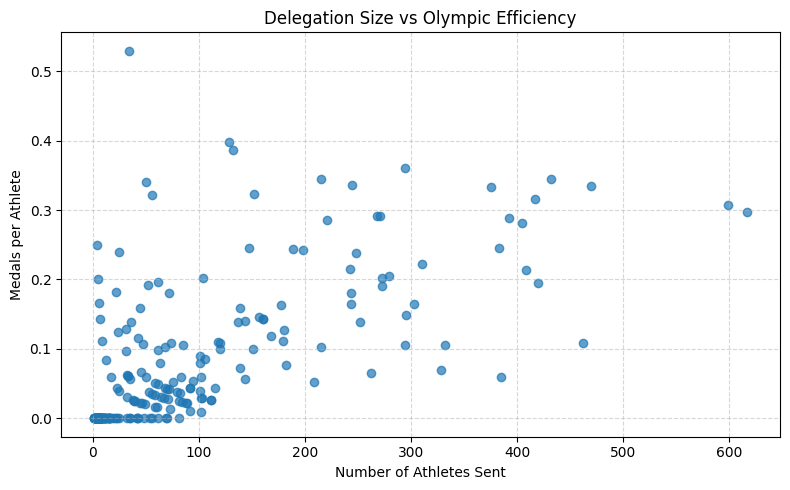

In [13]:
# Polished visualization for GitHub / LinkedIn
plt.figure(figsize=(8, 5))
plt.scatter(df['athletes_sent'], df['medals_per_athlete'], alpha=0.7)
plt.xlabel('Number of Athletes Sent')
plt.ylabel('Medals per Athlete')
plt.title('Delegation Size vs Olympic Efficiency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()